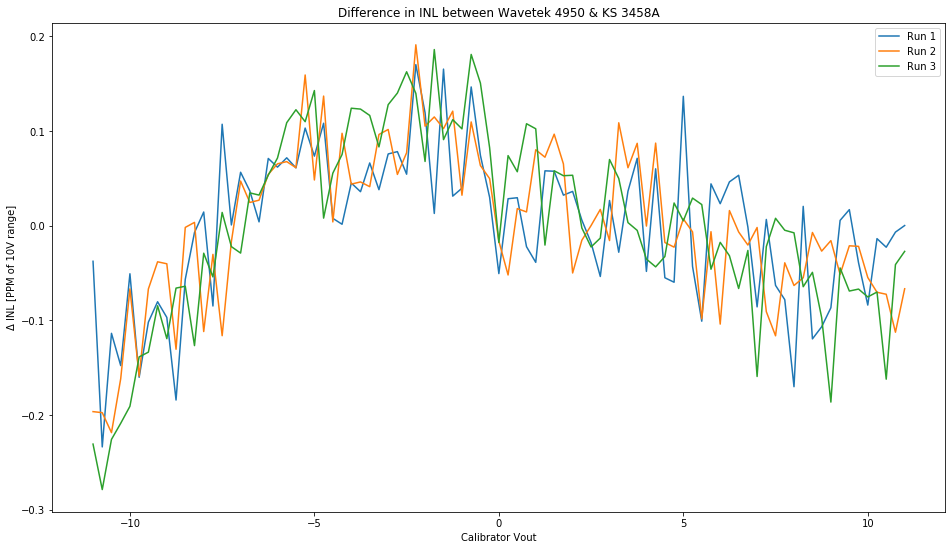

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def bestfit(ref, values):
    # Express difference of ref and values in PPM of range
    PPMdeviation = [(ref[x]-values[x])/(10/1000000) for x in range(len(values))]
    # Fit a polynomial function of degree 1
    terms = np.polyfit(ref, PPMdeviation, 1)
    # Create a polynomial function with these terms
    polyfunction = np.poly1d(terms)
    # Remove gain and offset errors from values
    return [PPMdeviation[x]-polyfunction(ref[x]) for x in range(len(values))]

figa, axa = plt.subplots()
axa.set_xlabel('Calibrator Vout')
axa.set_ylabel('Δ INL [PPM of 10V range]')
axa.set_title("Difference in INL between Wavetek 4950 & KS 3458A")
figa.set_size_inches(16, 9)
figa.patch.set_facecolor('white')

# Array from .csv
arra=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/datron_wavetek_4950/main/csv/20230831-224300_REPS5700A_3458A_3458B_4950_INL.csv',delimiter=',',skip_header=5)

# Columns to lists
F5700A = [row[0] for row in arra]
KS3458A = [row[2] for row in arra]
W4950 = [row[3] for row in arra]

bestfit_A = bestfit(F5700A, KS3458A)
bestfit_W = bestfit(F5700A, W4950)

A_vs_W = [bestfit_A[x]-bestfit_W[x] for x in range(len(bestfit_A))]
axa.plot(F5700A, A_vs_W, label='Run 1')


arra=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/datron_wavetek_4950/main/csv/20230901-023748_REPS5700A_3458A_3458B_4950_INL.csv',delimiter=',',skip_header=5)
F5700A = [row[0] for row in arra]
KS3458A = [row[2] for row in arra]
W4950 = [row[3] for row in arra]
bestfit_A = bestfit(F5700A, KS3458A)
bestfit_W = bestfit(F5700A, W4950)
A_vs_W = [bestfit_A[x]-bestfit_W[x] for x in range(len(bestfit_A))]
axa.plot(F5700A, A_vs_W, label='Run 2')

arra=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/datron_wavetek_4950/main/csv/20230901-064737_REPS5700A_3458A_3458B_4950_INL.csv',delimiter=',',skip_header=5)
F5700A = [row[0] for row in arra]
KS3458A = [row[2] for row in arra]
W4950 = [row[3] for row in arra]
bestfit_A = bestfit(F5700A, KS3458A)
bestfit_W = bestfit(F5700A, W4950)
A_vs_W = [bestfit_A[x]-bestfit_W[x] for x in range(len(bestfit_A))]
axa.plot(F5700A, A_vs_W, label='Run 3')



axa.legend()




